EDA ON SOUND 8K

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd

##### Some facts about librosa
1. It takes care of mono and stereo files.
2. It takes care of sampling rate.(22050)
3. returns normalized ndarray


In [2]:
filename = '344-3-4-0.wav'

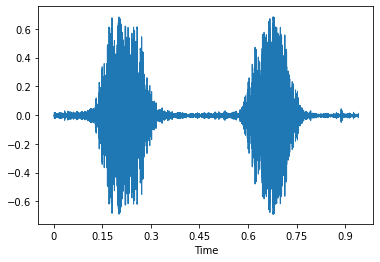

In [3]:
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

current;y we are getting a sample rate of 22050 Hz, but the standard for audio is 44100 Hz.


In [4]:
sample_rate

22050

In [5]:
data

array([-0.00274324, -0.00226056, -0.00111446, ...,  0.00106908,
        0.00128053,  0.00225282], dtype=float32)

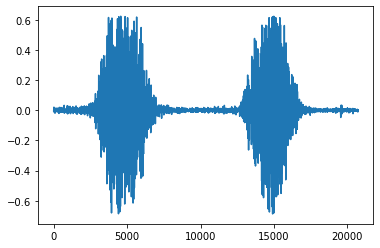

In [6]:
plt.plot(data)

#### Getting the dataset metadata

In [9]:
import pandas as pd
metadata = pd.read_csv('UrbanSound8K.csv')

In [11]:
## checking for balanced data
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

Now we will extract features from files and store them in a pandas dataframe. using MFCC

In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

In [13]:
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(r"E:\DATA SETS\UrbanSound8K\UrbanSound8K\audio"),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

3555it [09:16,  5.09it/s]c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [1:21:36, 18.55it/s] c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
c:\Users\pwayk\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [1:22:01,  1.77it/s]


feature             class
0  [-218.18938, 71.38549, -131.49442, -52.25892, ...          dog_bark
1  [-425.05234, 110.67095, -54.192833, 62.045414,...  children_playing
2  [-459.82623, 122.82864, -47.908062, 53.302677,...  children_playing
3  [-414.82184, 102.94826, -36.65685, 54.170742, ...  children_playing
4  [-447.60776, 115.08627, -53.74607, 61.55309, 1...  children_playing

In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-218.18938, 71.38549, -131.49442, -52.25892, ...          dog_bark
1  [-425.05234, 110.67095, -54.192833, 62.045414,...  children_playing
2  [-459.82623, 122.82864, -47.908062, 53.302677,...  children_playing
3  [-414.82184, 102.94826, -36.65685, 54.170742, ...  children_playing
4  [-447.60776, 115.08627, -53.74607, 61.55309, 1...  children_playing

##### We will save the data for futher use

In [24]:
pd.DataFrame(extracted_features_df).to_csv('extracted_features_df.csv',index=False)

In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))


ValueError: y should be a 1d array, got an array of shape (8732, 10) instead.

In [20]:
X

array([[-218.18938   ,   71.38549   , -131.49442   , ...,   -1.5696381 ,
          -0.75472176,    0.5339845 ],
       [-425.05234   ,  110.67095   ,  -54.192833  , ...,    0.63086635,
          -0.6702725 ,    0.5963404 ],
       [-459.82623   ,  122.82864   ,  -47.908062  , ...,    2.194272  ,
           1.5538616 ,   -0.7991638 ],
       ...,
       [-304.84702   ,  112.69567   ,  -47.21992   , ...,   -3.0244386 ,
           2.6847007 ,    7.674591  ],
       [-345.06885   ,  126.78658   ,  -56.18254   , ...,   -7.8130603 ,
          -1.766159  ,    5.8158836 ],
       [-316.331     ,   95.86536   ,  -38.176315  , ...,    0.609448  ,
         -11.483956  ,   -5.9417233 ]], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

In [23]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 [============================>.] - ETA: 0s - loss: 10.3777 - accuracy: 0.1182
Epoch 1: val_loss improved from inf to 2.28993, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 14s 13ms/step - loss: 10.3357 - accuracy: 0.1178 - val_loss: 2.2899 - val_accuracy: 0.1162
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 2.5126 - accuracy: 0.1217
Epoch 2: val_loss improved from 2.28993 to 2.27890, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 2.5122 - accuracy: 0.1218 - val_loss: 2.2789 - val_accuracy: 0.1133
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 2.3292 - accuracy: 0.1203
Epoch 3: val_loss improved from 2.27890 to 2.27120, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 2.3292 - accuracy: 0.1203 - val_loss: 2.2712 - val_accuracy: 

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7452776432037354


In [32]:
model.predict(X_test)

55/55 [==============================] - 8s 4ms/step


array([[2.21163686e-03, 2.28138175e-03, 2.04374231e-02, ...,
        8.57933955e-08, 1.56136474e-03, 2.99796686e-02],
       [3.64620246e-05, 2.99224188e-03, 5.35698002e-03, ...,
        2.26388129e-05, 1.85166094e-02, 2.29486302e-02],
       [4.23049351e-05, 1.51440995e-02, 7.68544152e-04, ...,
        5.08286119e-01, 1.25674895e-04, 1.07228626e-02],
       ...,
       [8.19892648e-07, 6.84015334e-01, 2.95209229e-05, ...,
        3.18679731e-08, 9.92362693e-05, 3.11718404e-01],
       [1.79261863e-01, 1.09608555e-02, 3.19614917e-01, ...,
        1.93519238e-02, 2.27740109e-02, 2.63099819e-01],
       [6.02661334e-02, 1.73930656e-02, 2.91294307e-01, ...,
        3.71944479e-04, 7.00393617e-02, 2.18443751e-01]], dtype=float32)

In [55]:
Y = extracted_features_df['class'].unique().tolist()

In [58]:
filename="344-3-4-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
labelencoder.fit(Y)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class 

[-2.6977017e+02  1.3238858e+02  2.4949071e+00 -1.4897638e+01
 -4.5520840e+01  8.5442514e+00 -2.3441055e+01 -2.0223001e+01
 -2.5094149e+01 -8.8268957e+00 -1.0620856e+00  1.2199959e+00
 -3.0501487e+00 -3.3334835e+00 -1.3199317e+00  5.8557963e+00
  2.9053205e-01 -6.4423923e+00 -4.9864984e+00 -2.2928913e+00
 -9.8934889e+00 -6.4396777e+00 -7.5701928e+00 -4.5171719e+00
 -2.4011128e+00  6.1073142e-01  1.1739403e+00 -1.3563875e+00
 -8.4628928e-01  3.0036786e+00 -3.4504253e-01 -3.5317285e+00
 -1.4872164e+00  1.0998499e+00 -4.6461616e-02 -2.2416255e+00
 -2.3780553e+00 -2.3726897e+00 -2.3863044e+00 -8.3910900e-01]
[[-2.6977017e+02  1.3238858e+02  2.4949071e+00 -1.4897638e+01
  -4.5520840e+01  8.5442514e+00 -2.3441055e+01 -2.0223001e+01
  -2.5094149e+01 -8.8268957e+00 -1.0620856e+00  1.2199959e+00
  -3.0501487e+00 -3.3334835e+00 -1.3199317e+00  5.8557963e+00
   2.9053205e-01 -6.4423923e+00 -4.9864984e+00 -2.2928913e+00
  -9.8934889e+00 -6.4396777e+00 -7.5701928e+00 -4.5171719e+00
  -2.4011128e+00 

ValueError: y should be a 1d array, got an array of shape (1, 10) instead.